## Hamna Ashraf
### 8826836

### Lab Assignment 5

#### Required Libraries:

In [204]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
import pandas as pd



## EDA:

In [205]:
diabetes = datasets.load_diabetes(as_frame=True, scaled=False)
data, target = diabetes.data, diabetes.target
data['target'] = target

In [206]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


#### Correlation Matrix:

<Axes: >

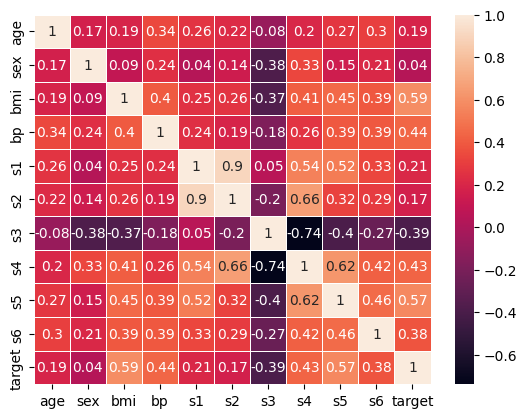

In [207]:
corr_values = data.corr().round(2)
sns.heatmap(corr_values, annot=True, linewidth=.5)

By checking the correlation matrix, we can see that not all features are strongly co-related with one another. Especially age has a weak correlation with other features.\
But there is a somehow a very weak corelation. Therefore, we don't want remove the data that might appear useful for us later.

#### Checking all feature histograms:

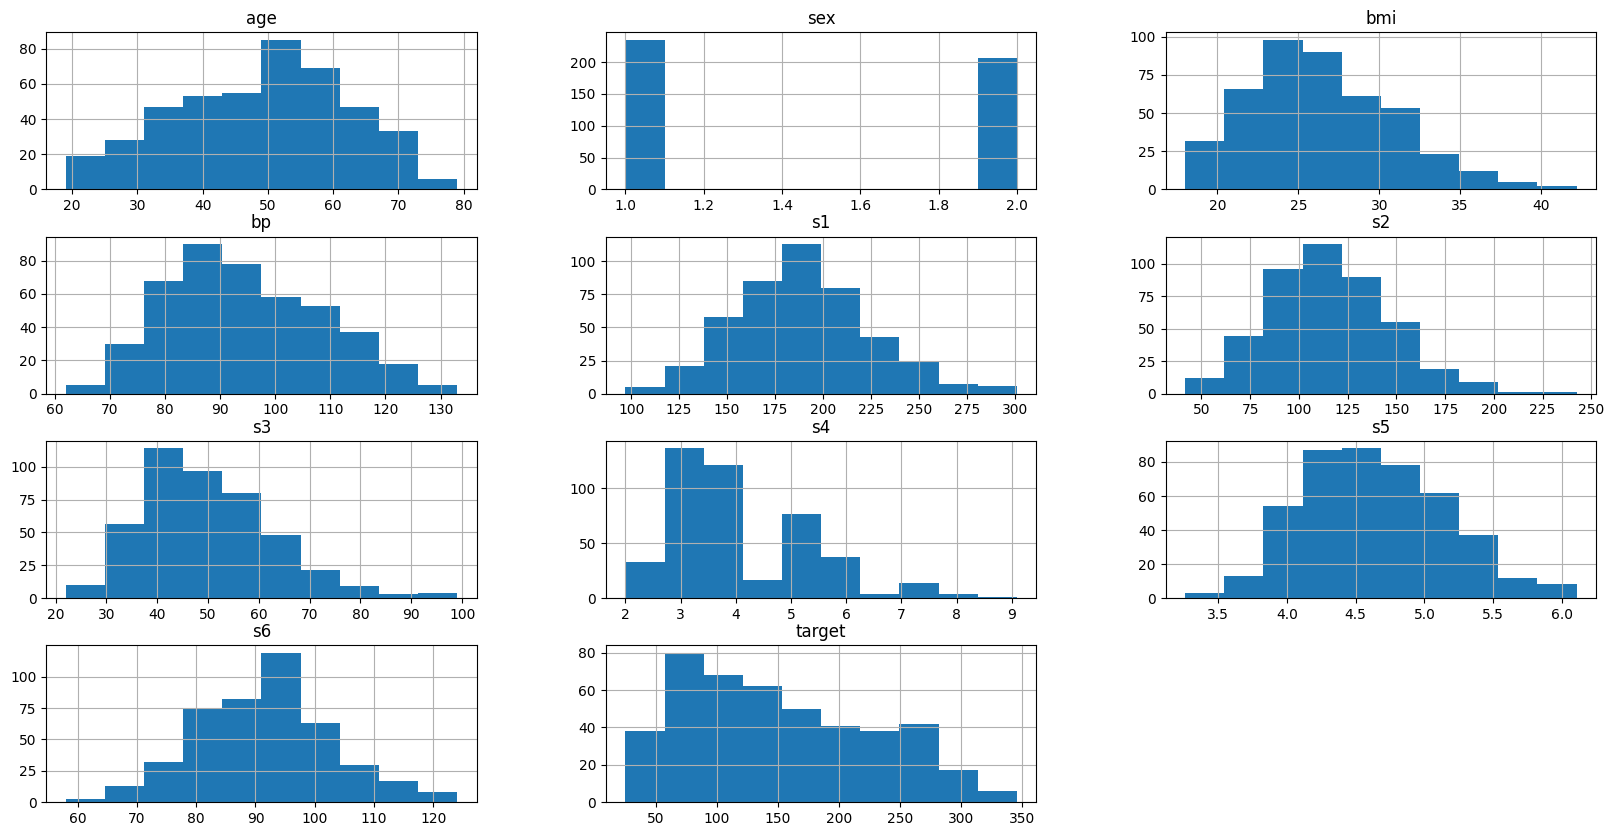

In [208]:
data.hist(figsize=(20,10))
plt.show()

We can clearly see that the data is normally distributted for all the histogram feature plots we have in our data. 

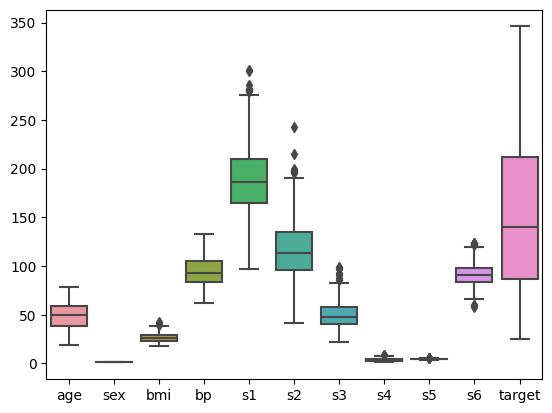

In [209]:
sns.boxplot(diabetes.data)
plt.show()

Based on the boxplots we see above, there are no outliers that would have an impact on our data.

**Conclusion**:
We can consider all features without dropping any of them.

#### Setting the test set aside:

In [210]:
#Splitting data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0) 

### Polynomial Regression:

In [211]:
degrees = [2,3]
polynomial_models = {}
for degree in degrees:
    model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                        ('linear', LinearRegression())])
    model.fit(X_train, y_train)
    polynomial_models[degree] = model


polynomial_models

{2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                 ('linear', LinearRegression())]),
 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])}

### Decision Tree:

In [212]:
depth_tree = [3,4]
decision_models = {}

for depth in depth_tree:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(X_train, y_train)
    decision_models[depth] = model

decision_models

{3: DecisionTreeRegressor(max_depth=3), 4: DecisionTreeRegressor(max_depth=4)}

### KNN:

In [213]:
knn = [3,4]
knn_models = {}

for neighbour in knn:
    model = KNeighborsRegressor(n_neighbors = neighbour)
    model.fit(X_train, y_train)
    knn_models[neighbour] = model

knn_models

{3: KNeighborsRegressor(n_neighbors=3), 4: KNeighborsRegressor(n_neighbors=4)}

### Cross-Validation:

In [214]:
poly_cv_results = []
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

for degree,model in polynomial_models.items():
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
    poly_cv_results.append(scores)


poly_cv_df = pd.DataFrame(poly_cv_results)

poly_cv_results

[{'fit_time': array([0.01618171, 0.02072787, 0.01360106, 0.0147264 , 0.01261258]),
  'score_time': array([0.        , 0.00194693, 0.00200152, 0.00200319, 0.00200057]),
  'test_r2': array([1., 1., 1., 1., 1.]),
  'test_neg_mean_absolute_error': array([-2.52883160e-12, -2.52192633e-12, -5.38010950e-13, -1.37672730e-12,
         -2.09711613e-12]),
  'test_neg_mean_absolute_percentage_error': array([-2.45782101e-14, -2.13014374e-14, -4.75960377e-15, -1.32700835e-14,
         -1.68151579e-14])},
 {'fit_time': array([0.0773468 , 0.06364894, 0.07681632, 0.10416341, 0.07166123]),
  'score_time': array([0.00200176, 0.01268768, 0.00253797, 0.00198841, 0.00200081]),
  'test_r2': array([0.9996872 , 0.99991279, 0.99968212, 0.99927632, 0.99962645]),
  'test_neg_mean_absolute_error': array([-0.750033  , -0.47142892, -0.90228803, -1.15981223, -1.11176176]),
  'test_neg_mean_absolute_percentage_error': array([-0.00586324, -0.00348705, -0.00668015, -0.01068595, -0.00737517])}]

In [215]:
decision_cv_results = []

for degree, model in decision_models.items():
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
    decision_cv_results.append(scores)

decision_cv_df = pd.DataFrame(decision_cv_results)

decision_cv_results

[{'fit_time': array([0.00151539, 0.        , 0.        , 0.00307822, 0.        ]),
  'score_time': array([0.        , 0.        , 0.00987434, 0.00012779, 0.        ]),
  'test_r2': array([0.97609543, 0.9773424 , 0.97960509, 0.97881853, 0.97568939]),
  'test_neg_mean_absolute_error': array([-10.15471308,  -9.58869683,  -9.12163469,  -8.97775277,
          -9.86933144]),
  'test_neg_mean_absolute_percentage_error': array([-0.09231926, -0.07573048, -0.09260466, -0.0791138 , -0.08162868])},
 {'fit_time': array([0.        , 0.        , 0.00200558, 0.00284529, 0.        ]),
  'score_time': array([0.        , 0.01261091, 0.00086999, 0.        , 0.        ]),
  'test_r2': array([0.99432178, 0.99375734, 0.99314839, 0.99512337, 0.99389501]),
  'test_neg_mean_absolute_error': array([-4.6590326 , -5.05199369, -5.34047648, -4.49118856, -5.34942623]),
  'test_neg_mean_absolute_percentage_error': array([-0.04218649, -0.04116375, -0.05305009, -0.04198837, -0.04385112])}]

In [216]:
knn_cv_results = []

for degree, model in decision_models.items():
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
    knn_cv_results.append(scores)

knn_cv_df = pd.DataFrame(knn_cv_results)

knn_cv_results

[{'fit_time': array([0.0012095 , 0.        , 0.00943065, 0.00235128, 0.        ]),
  'score_time': array([0.        , 0.        , 0.00222421, 0.00044513, 0.        ]),
  'test_r2': array([0.97609543, 0.9773424 , 0.97960509, 0.97881853, 0.97568939]),
  'test_neg_mean_absolute_error': array([-10.15471308,  -9.58869683,  -9.12163469,  -8.97775277,
          -9.86933144]),
  'test_neg_mean_absolute_percentage_error': array([-0.09231926, -0.07573048, -0.09260466, -0.0791138 , -0.08162868])},
 {'fit_time': array([0.        , 0.00314999, 0.00201297, 0.        , 0.00941801]),
  'score_time': array([0.00961733, 0.00200939, 0.        , 0.        , 0.00177574]),
  'test_r2': array([0.99432178, 0.99375734, 0.99314839, 0.99512337, 0.99389501]),
  'test_neg_mean_absolute_error': array([-4.6590326 , -5.05199369, -5.34047648, -4.49118856, -5.34942623]),
  'test_neg_mean_absolute_percentage_error': array([-0.04218649, -0.04116375, -0.05305009, -0.04198837, -0.04385112])}]

In [217]:
poly_cv_df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,"[0.01618170738220215, 0.020727872848510742, 0....","[0.0, 0.0019469261169433594, 0.002001523971557...","[1.0, 1.0, 1.0, 1.0, 1.0]","[-2.5288316042143624e-12, -2.521926329740074e-...","[-2.4578210077298986e-14, -2.130143742303784e-..."
1,"[0.0773468017578125, 0.06364893913269043, 0.07...","[0.0020017623901367188, 0.01268768310546875, 0...","[0.9996871971629486, 0.9999127914287887, 0.999...","[-0.7500330025260014, -0.47142891852721874, -0...","[-0.005863235936443113, -0.0034870453724598714..."


In [218]:
decision_cv_df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,"[0.0015153884887695312, 0.0, 0.0, 0.0030782222...","[0.0, 0.0, 0.009874343872070312, 0.00012779235...","[0.9760954318883467, 0.9773424027979054, 0.979...","[-10.154713083132828, -9.588696827429219, -9.1...","[-0.09231925608184031, -0.07573048359331443, -..."
1,"[0.0, 0.0, 0.0020055770874023438, 0.0028452873...","[0.0, 0.012610912322998047, 0.0008699893951416...","[0.9943217844314327, 0.9937573421846522, 0.993...","[-4.6590326031865, -5.051993694185866, -5.3404...","[-0.042186491138786884, -0.04116375209487312, ..."


In [219]:
knn_cv_df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,"[0.0012094974517822266, 0.0, 0.009430646896362...","[0.0, 0.0, 0.0022242069244384766, 0.0004451274...","[0.9760954318883467, 0.9773424027979054, 0.979...","[-10.154713083132828, -9.588696827429219, -9.1...","[-0.09231925608184031, -0.07573048359331443, -..."
1,"[0.0, 0.0031499862670898438, 0.002012968063354...","[0.009617328643798828, 0.0020093917846679688, ...","[0.9943217844314327, 0.9937573421846522, 0.993...","[-4.6590326031865, -5.051993694185866, -5.3404...","[-0.042186491138786884, -0.04116375209487312, ..."


Polynomial Plot

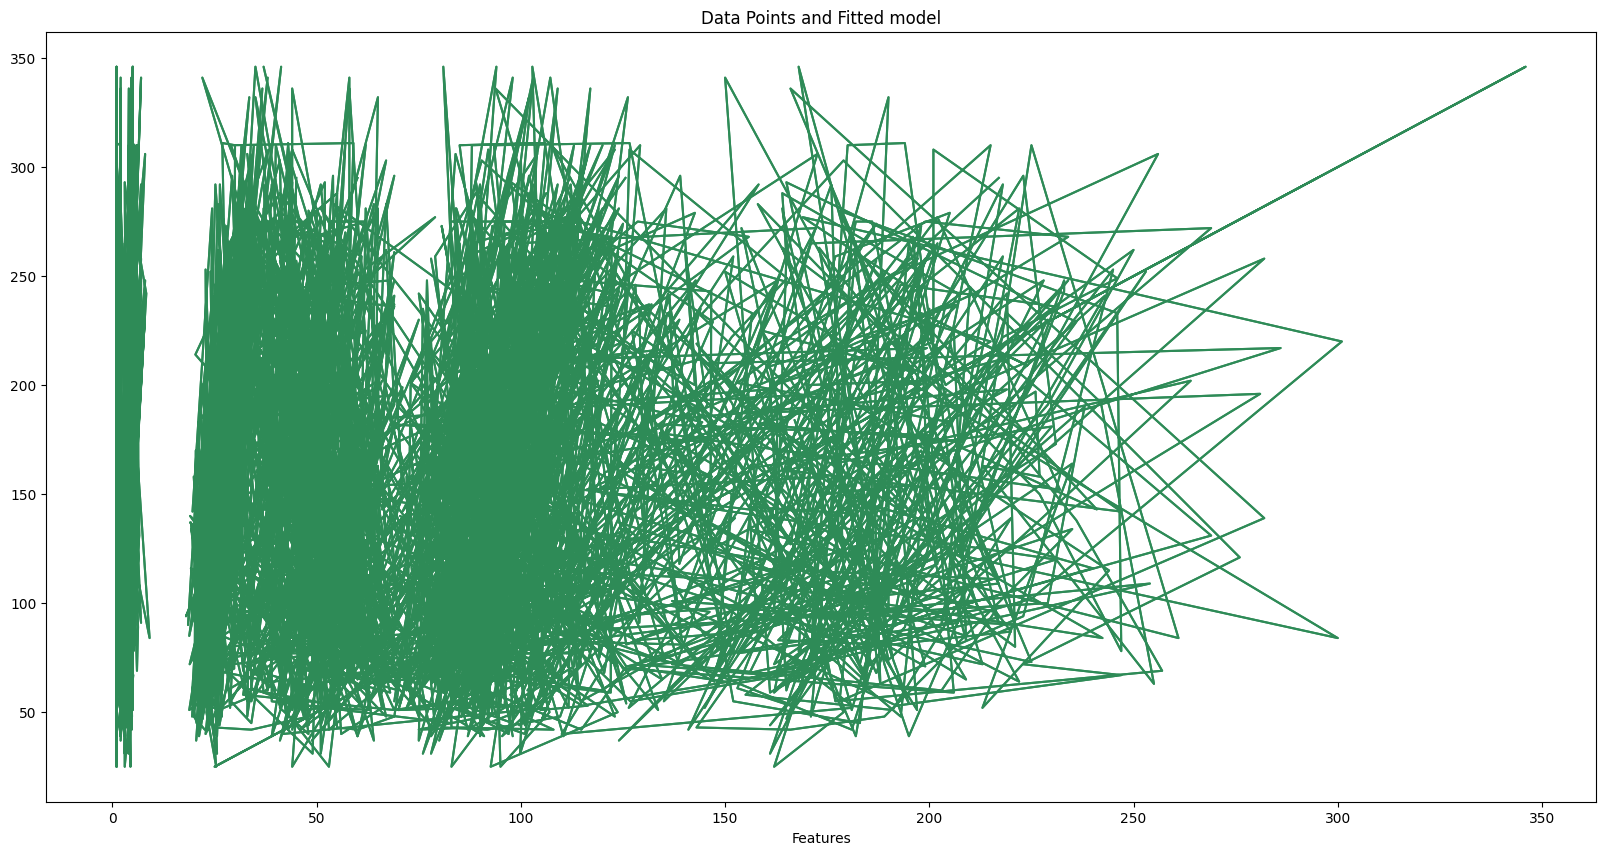

In [220]:
plt.figure(figsize=(20,10))

for degree,model in polynomial_models.items():
    plt.plot(X_train, model.predict(X_train), label='Polynomial Regression',color='#2E8B57')


plt.xlabel('Features')
plt.title('Data Points and Fitted model')
plt.show()

Decision Tree Plot

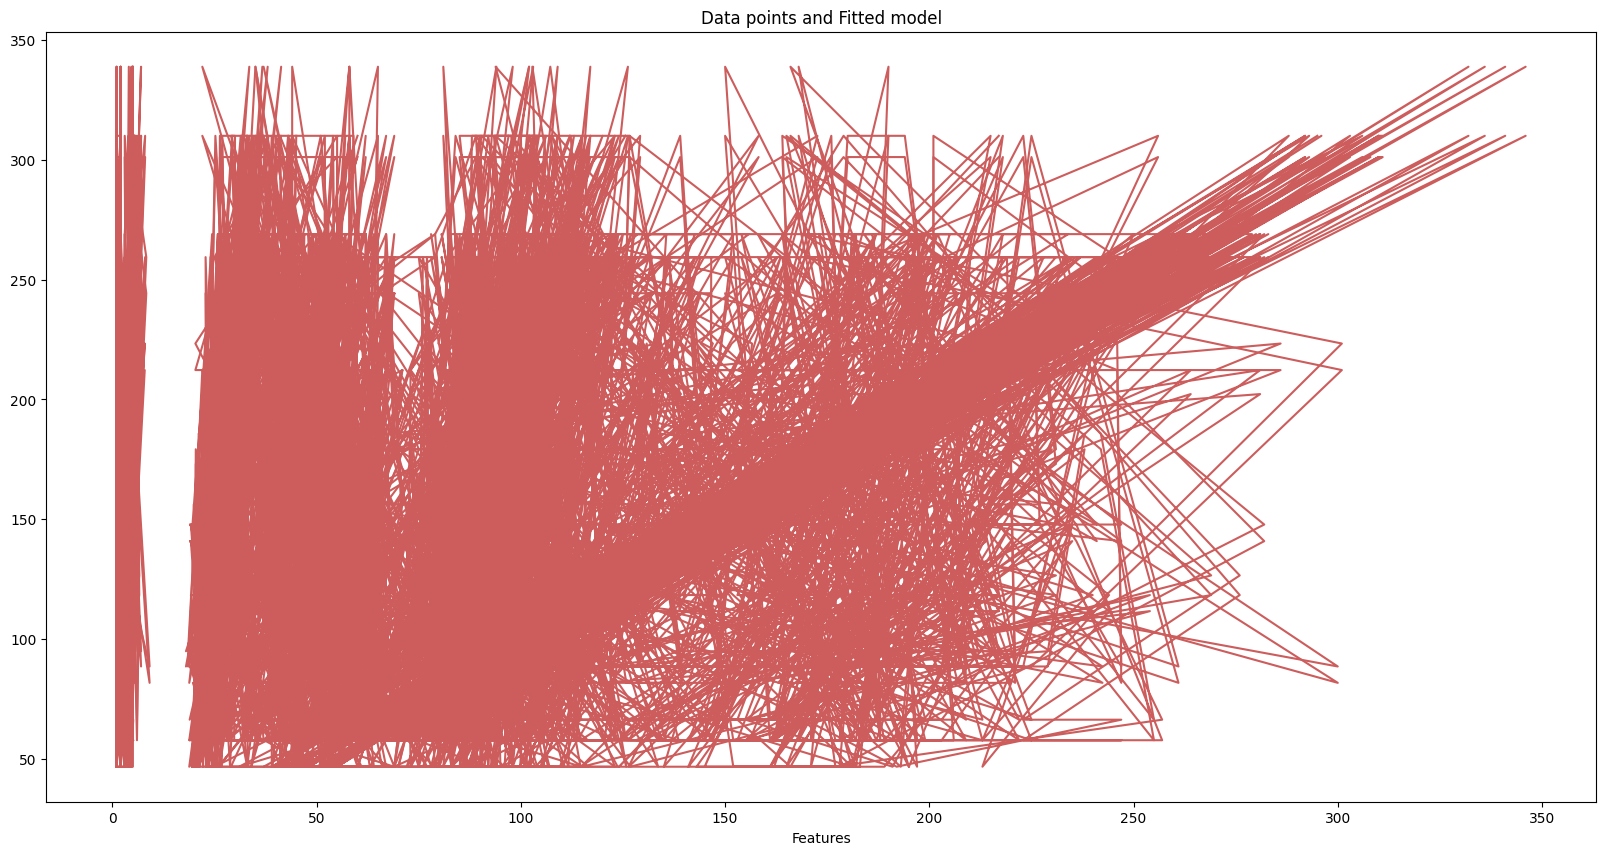

In [221]:
plt.figure(figsize=(20,10))

for degree,model in decision_models.items():
    plt.plot(X_train, model.predict(X_train), color='#CD5C5C')



plt.xlabel('Features')
plt.title('Data points and Fitted model')
plt.show()


KNN Plot:

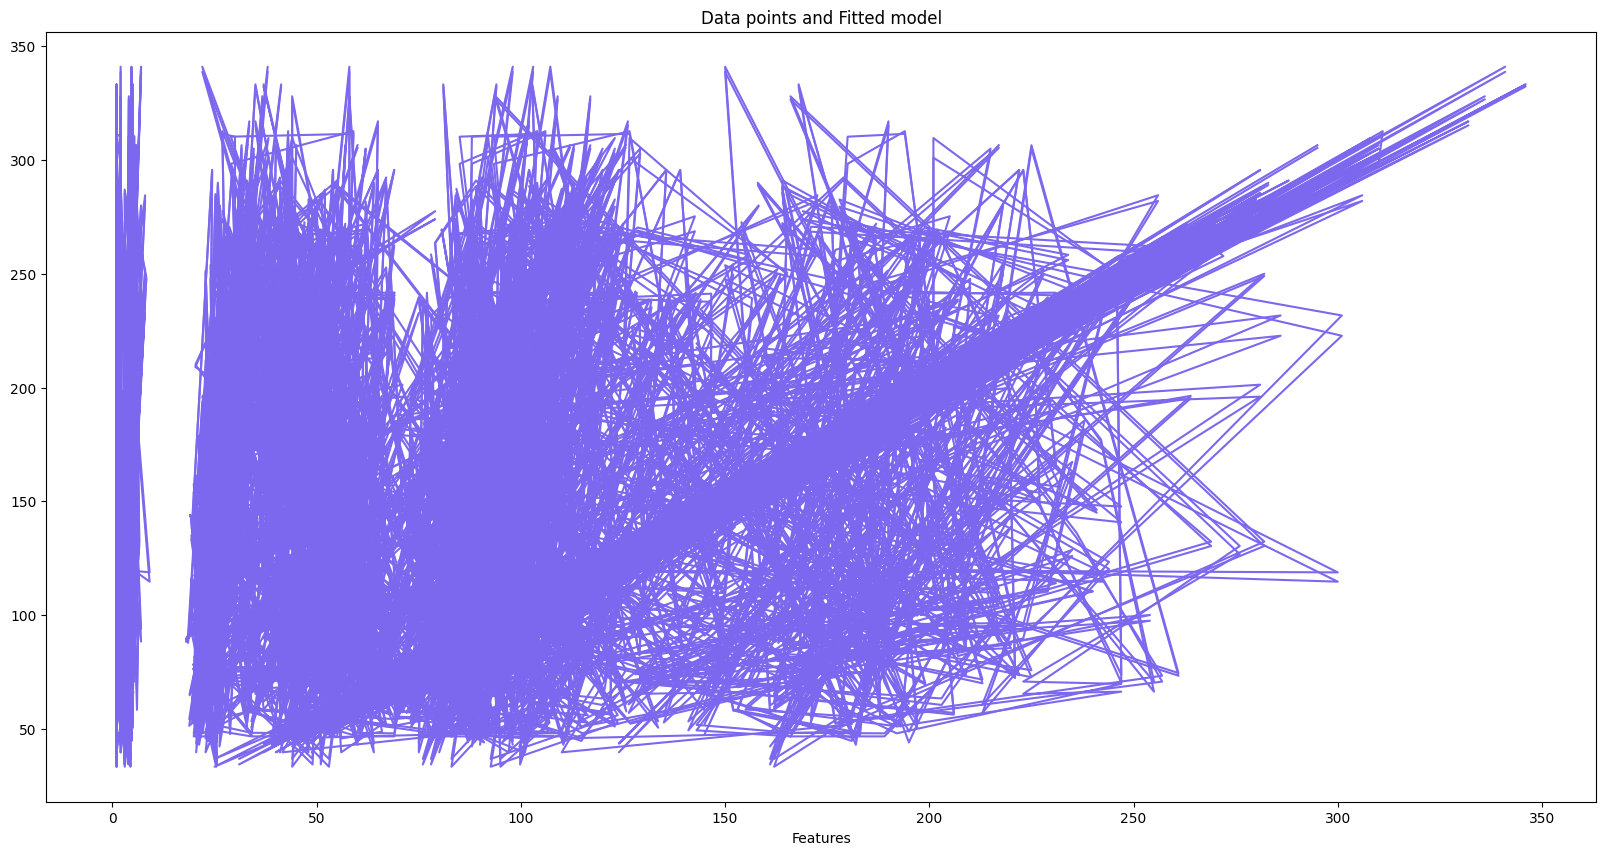

In [225]:
plt.figure(figsize=(20,10))

for degree,model in knn_models.items():
    plt.plot(X_train, model.predict(X_train), color='#7B68EE')


plt.xlabel('Features')
plt.title('Data points and Fitted model')
plt.show()


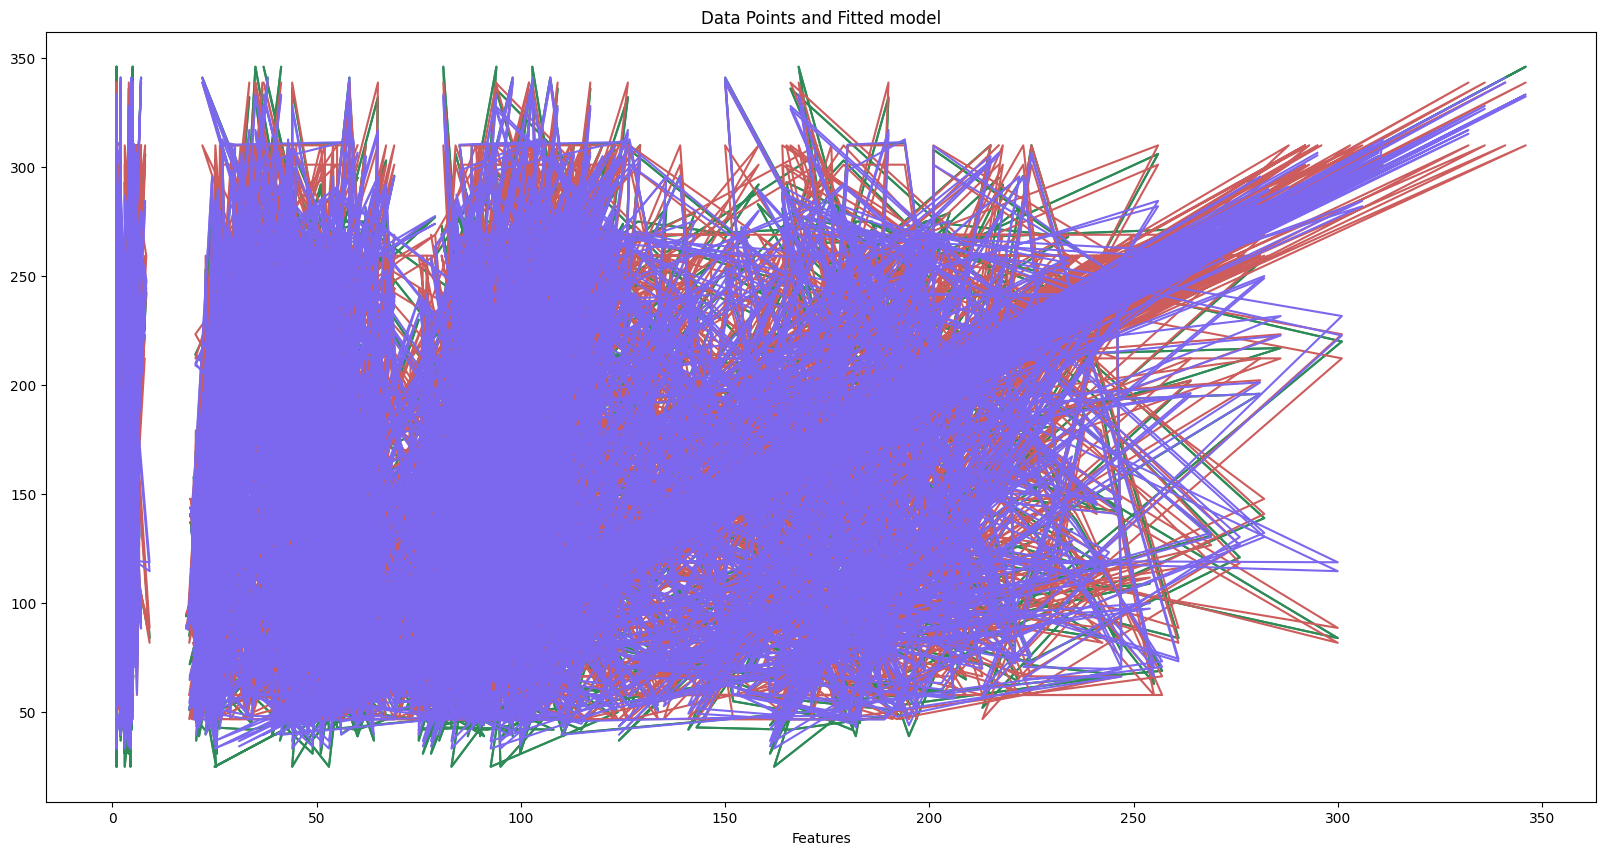

In [228]:
plt.figure(figsize=(20,10))

for degree,model in polynomial_models.items():
    plt.plot(X_train, model.predict(X_train),color='#2E8B57')


for degree,model in decision_models.items():
    plt.plot(X_train, model.predict(X_train), color='#CD5C5C')

for degree,model in knn_models.items():
    plt.plot(X_train, model.predict(X_train),color='#7B68EE')




plt.xlabel('Features')
plt.title('Data Points and Fitted model')
plt.show()

From the collective graph we can see that almost all models gave similar results so we can use any model for our dataset.